## Edge detection of potential-field sources
Edge detection can provide useful information for potential field data interpretation. A contact between a magnetic source and its host rock, and deep-seated faults are two geological phenomena that can be observed by edges in potential field data. So, finding the edges which might be related to possible conduit to hydrothermal fluids (i.e. geological contacts and fault) may lead to the discovery of a mineral deposit. 

Image processing techniques are widely used for edge detection for images. Such techniques can be used on magnetic and gravity grids to detect boundaries of magnetic and gravity sources. There are a number of algorithms used in geophysical software packages to create a map showing detected edges. With the recent increase in desire to use open-source libraries for geophysical data processing and mineral potential mapping, it is preferred for many to execute the edge detection step as one of the pre-processing steps in mineral potential mapping in Python. 

This script reads a magnetic/gravity grid as a raster file and implement Canny edge detection algorithm on the image. The result can be represented as a raster file for which pixels with True values represent detected edges. 


## Import libraries
OpenCV is a library that is widely used in Computer Vision. It contains Canny function which is an operator to detect edges in an image. It is a multi-stage algorithm that uses gradient calculation to detect edges. More information can be found here: 

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

Although, this step is not necessary (because a raster representing edges is what is needed to be used as input for a mineral potential mapping project), the 'Straight line Hough transform' algorithm is used to to create straight lines from detected edges. 
https://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html

In [15]:
import numpy as np
import cv2 as cv
from skimage.transform import probabilistic_hough_line

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

## Import the raster image

The input image for the Canny algorithm should be a single band, gray-scale image. 

cv.cvtColor converts an RGB image to gray-scale.

In [16]:
img=cv.imread('RMI_RGB.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [17]:
#size of the images
print('Original image: {}'.format(img.shape))
print('Grayscale image: {}'.format(gray.shape))

Original image: (1278, 930, 3)
Grayscale image: (1278, 930)


## Plot the image

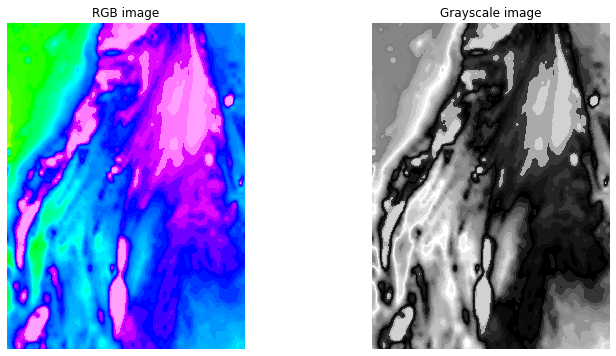

In [4]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
ax = axes.ravel()
ax[0].imshow(img)
ax[0].set_title('RGB image')
axes[0].axis(False)
ax[1].imshow(gray, cmap=cm.gray)
ax[1].set_title('Grayscale image')
axes[1].axis(False)
plt.show()

## Edge detection
Three parameters can be tuned to get a desired result from Canny edge detector algorithm: two parameters for minimum and maximum threshold values, and the aperture size (the size of Sobel kernel used for finding image gradients). The kernel can only take 3, 5 or 7.
The algorithm differentia between strong edges, weak edges and irrelevant edges through ‘Hysteresis Thresholding’ (using minVal and maxVal values). Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded.
To facilitate getting the input information during parameter tuning, OpenCV provides a function to add a trackbar to an image window. More details about creating trackbars can be found here:

 https://simplycodebased.org/opencv-jetpack/build-a-canny-edge-detector-slider-for-opencv/
 https://docs.opencv.org/3.4/da/d6a/tutorial_trackbar.html

Three parameters for 'probabilistic_hough_line' can also be tuned using trackbars: the minimum line length, the line gap and the general threshold.
By changing the parameters, the results will be shown on two image windows.

In [21]:
# empty callback function for creating trackar
def callback(foo):
    pass

# create windows and trackbars
cv.namedWindow('edges',cv.WINDOW_NORMAL)
cv.resizeWindow('edges', 600,600)

cv.namedWindow('image',cv.WINDOW_NORMAL)
cv.resizeWindow('image', 600,600)

# trackbars for Canny
cv.createTrackbar('Canny_thr1', 'edges', 50, 300, callback)  
cv.createTrackbar('Canny_thr2', 'edges', 112, 300, callback) 
cv.createTrackbar('Canny_aperture', 'edges', 0, 2, callback)

# trackbars for probabilistic_hough_line
cv.createTrackbar('HL_thr', 'edges', 12, 300, callback) 
cv.createTrackbar('HL_length', 'edges', 1, 300, callback) 
cv.createTrackbar('HL_gap', 'edges', 5, 300, callback)

while(True):
    img=cv.imread('RMI_RGB.png')
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # get parameters value from trackbar
    th1 = cv.getTrackbarPos('Canny_thr1', 'edges')
    th2 = cv.getTrackbarPos('Canny_thr2', 'edges')
    apSize = cv.getTrackbarPos('Canny_aperture', 'edges')*2+3
    
    
    l_th = cv.getTrackbarPos('HL_thr', 'edges')
    l_length = cv.getTrackbarPos('HL_length', 'edges')
    l_gap = cv.getTrackbarPos('HL_gap', 'edges')
    #------------

    # create edges and lines
    edge = cv.Canny(gray, th1, th2,apertureSize=apSize)
    lines = probabilistic_hough_line(edge, threshold=l_th, line_length=l_length, line_gap=l_gap, seed=1)
    
    # shows edges and trackbars in a window
    cv.imshow('edges', edge)
    
    # plot lines (the format is different from plt.plot (x1,x2)(y1,y2))
    for line in lines:
        p0, p1 = line
        cv.line(gray,(p0[0], p0[1]), (p1[0], p1[1]),(0,0,255),1)
    
    cv.imshow('image',gray)
    
    # press q to safely close image windows
    if cv.waitKey(1)&0xFF == ord('q'):
        break
        
cv.destroyAllWindows()

The edge window and trackbars look like this:

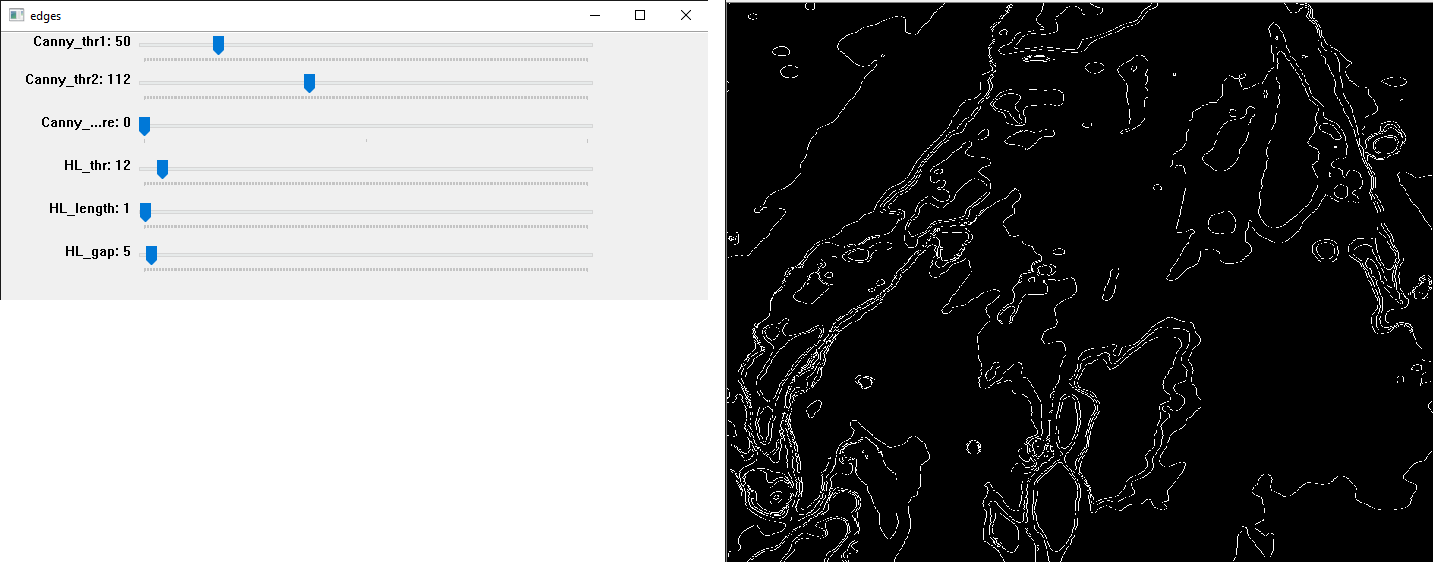

In [11]:
# write the edge raster to a new variable
edge_raster=edge

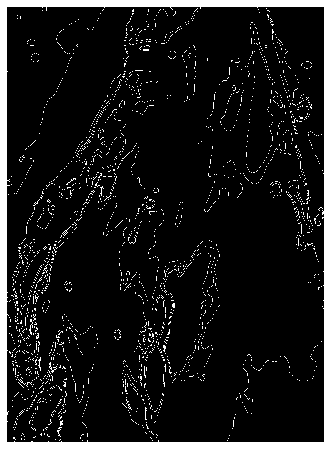

In [13]:
plt.figure(figsize=(8,8))
plt.axis(False)
plt.imshow(edge_raster, cmap=cm.gray)